In [1]:
# -*- coding: utf-8 -*-

In [2]:
import nbimporter
from CNN_Model import *
from keras.models import load_model
import numpy as np
from keras.preprocessing import image
from keras.applications import imagenet_utils

Importing Jupyter notebook from CNN_Model.ipynb


Using Theano backend.


Importing Jupyter notebook from Train_Dataset_Generation.ipynb
Importing Jupyter notebook from Dataset_Preparation.ipynb


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import itertools
from sklearn.metrics import confusion_matrix

In [4]:
n_classes =  133
n_rows = 32
n_cols = 32
%matplotlib inline

In [5]:
def predictY(model,X_test):
    X_test = X_test.reshape(X_test.shape[0],n_rows,n_cols,1)
    predictions = model.predict(X_test,batch_size = 50,verbose =1 )
    return np.array(predictions)

In [6]:
n_classes = 133
n_rows = 32
n_cols = 32
batch_size = 256
epochs = 20
learning_rate = 0.01
decay = 1e-6
momentum = .9

In [7]:
def create_model_BN():
    # conv-conv-pool ==> conv-conv-pool ==> dense ==>dense
    print('Building Model..')
    model = Sequential()
    
    model.add(Conv2D(32,(3,3),input_shape=(n_rows,n_cols,1),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    BatchNormalization(axis=1)
    model.add(Conv2D(64,(3,3),activation='relu'))
    BatchNormalization(axis=1)
    model.add(MaxPooling2D((2,2),strides=(2,2)))
    model.add(ZeroPadding2D((1,1)))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    BatchNormalization(axis=1)
    model.add(Conv2D(64,(3,3),activation='relu')) 
    BatchNormalization(axis=1)

    model.add(MaxPooling2D((2,2),strides=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(2018, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(n_classes, activation='softmax'))
    
    sgd = SGD(lr = learning_rate, decay = decay, momentum = momentum,nesterov=True)
    model.compile(optimizer = sgd, loss='categorical_crossentropy',metrics=['accuracy'])
    
    print('Model Generated')
    
    return model

In [8]:
model = create_model_BN()

Building Model..
Model Generated


In [9]:
model.load_weights("/home/amrith/Machine-Learning/MalayalamOCR/Successful-Models/train3_bn_96.h5")

In [10]:
X_train,X_test,y_train,y_test = mal_char_data()

In [11]:
predictions = predictY(model,X_test)

8644/8644 [==============================] - 39s    


In [12]:
predictions.shape

(8644, 133)

In [13]:
predicted_classes = [np.argmax(x) for x in predictions]

In [14]:
encoder = preprocessing.LabelEncoder()
X_train,X_test,y_train,y_test = loadDatasetFromFile()

In [15]:
encoder.fit(y_train)

LabelEncoder()

In [16]:
classList = np.asarray(encoder.classes_)

In [17]:
classList

array(["'", "'2", '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', "item_''", 'item_,', 'item_dot', 'item_ques',
       '\xe0\xb4\x85', '\xe0\xb4\x86', '\xe0\xb4\x87', '\xe0\xb4\x89',
       '\xe0\xb4\x8b', '\xe0\xb4\x8e', '\xe0\xb4\x8f', '\xe0\xb4\x92',
       '\xe0\xb4\x95', '\xe0\xb4\x95\xe0\xb5\x8d\xe0\xb4\x95',
       '\xe0\xb4\x95\xe0\xb5\x8d\xe0\xb4\xa4',
       '\xe0\xb4\x95\xe0\xb5\x8d\xe0\xb4\xb7', '\xe0\xb4\x96',
       '\xe0\xb4\x97', '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\x97',
       '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\xa8',
       '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\xae',
       '\xe0\xb4\x97\xe0\xb5\x8d\xe0\xb4\xb2', '\xe0\xb4\x98',
       '\xe0\xb4\x99', '\xe0\xb4\x99\xe0\xb5\x8d\xe0\xb4\x95',
       '\xe0\xb4\x99\xe0\xb5\x8d\xe0\xb4\x99', '\xe0\xb4\x9a',
       '\xe0\xb4\x9a\xe0\xb5\x8d\xe0\xb4\x9a',
       '\xe0\xb4\x9a\xe0\xb5\x8d\xe0\xb4\x9b', '\xe0\xb4\x9b',
       '\xe0\xb4\x9c', '\xe0\xb4\x9c\xe0\xb5\x8d\xe0\xb4\x9c',
       '\xe0\xb4\x9c\xe0\

In [18]:
class_to_ix_Dict = { classList[i] : i for i in range(len(classList)) }

In [19]:
datasetix_to_class_Dict = { i : classList[i] for i in range(len(classList)) }

In [20]:
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i].decode('utf-8'), fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [21]:
def plots_idx(idx, titles=None):
    plots([image.array_to_img((X_test[i].reshape(32,32,1))) for i in idx], titles=titles)
n_view=4

In [33]:
def samplePrediction():
    random_images = np.random.randint(0,X_test.shape[0],4)
    class_labels = classList[predicted_classes][random_images]
    plots_idx(random_images)
    for x in class_labels:
        print x.decode('utf-8'),

ത്ത ന്ന ർ item_ques


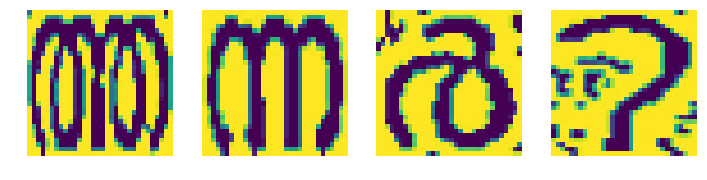

In [36]:
samplePrediction()

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
predicted_classes

[115,
 80,
 97,
 50,
 63,
 83,
 99,
 14,
 120,
 46,
 114,
 112,
 115,
 33,
 123,
 20,
 25,
 23,
 56,
 101,
 46,
 89,
 33,
 76,
 101,
 88,
 122,
 95,
 41,
 55,
 75,
 58,
 10,
 22,
 22,
 18,
 5,
 121,
 27,
 97,
 33,
 71,
 28,
 96,
 0,
 89,
 99,
 54,
 41,
 130,
 109,
 29,
 109,
 109,
 99,
 19,
 123,
 19,
 64,
 89,
 117,
 63,
 55,
 29,
 8,
 55,
 31,
 121,
 52,
 84,
 86,
 22,
 109,
 88,
 116,
 96,
 124,
 20,
 54,
 89,
 42,
 15,
 71,
 114,
 97,
 55,
 1,
 28,
 17,
 64,
 22,
 99,
 74,
 22,
 82,
 75,
 18,
 54,
 115,
 17,
 120,
 126,
 22,
 122,
 100,
 100,
 52,
 53,
 33,
 82,
 117,
 111,
 115,
 76,
 108,
 114,
 114,
 108,
 38,
 117,
 28,
 117,
 17,
 42,
 123,
 55,
 72,
 129,
 96,
 120,
 2,
 3,
 102,
 104,
 75,
 64,
 106,
 99,
 104,
 114,
 111,
 89,
 23,
 93,
 85,
 63,
 111,
 117,
 83,
 128,
 116,
 108,
 83,
 108,
 122,
 63,
 6,
 1,
 121,
 84,
 124,
 108,
 75,
 118,
 31,
 52,
 109,
 76,
 29,
 58,
 55,
 82,
 93,
 121,
 59,
 96,
 78,
 70,
 75,
 82,
 21,
 2,
 19,
 84,
 86,
 93,
 29,
 93,
 83,
 95,
 

In [26]:
predicted_classes

[115,
 80,
 97,
 50,
 63,
 83,
 99,
 14,
 120,
 46,
 114,
 112,
 115,
 33,
 123,
 20,
 25,
 23,
 56,
 101,
 46,
 89,
 33,
 76,
 101,
 88,
 122,
 95,
 41,
 55,
 75,
 58,
 10,
 22,
 22,
 18,
 5,
 121,
 27,
 97,
 33,
 71,
 28,
 96,
 0,
 89,
 99,
 54,
 41,
 130,
 109,
 29,
 109,
 109,
 99,
 19,
 123,
 19,
 64,
 89,
 117,
 63,
 55,
 29,
 8,
 55,
 31,
 121,
 52,
 84,
 86,
 22,
 109,
 88,
 116,
 96,
 124,
 20,
 54,
 89,
 42,
 15,
 71,
 114,
 97,
 55,
 1,
 28,
 17,
 64,
 22,
 99,
 74,
 22,
 82,
 75,
 18,
 54,
 115,
 17,
 120,
 126,
 22,
 122,
 100,
 100,
 52,
 53,
 33,
 82,
 117,
 111,
 115,
 76,
 108,
 114,
 114,
 108,
 38,
 117,
 28,
 117,
 17,
 42,
 123,
 55,
 72,
 129,
 96,
 120,
 2,
 3,
 102,
 104,
 75,
 64,
 106,
 99,
 104,
 114,
 111,
 89,
 23,
 93,
 85,
 63,
 111,
 117,
 83,
 128,
 116,
 108,
 83,
 108,
 122,
 63,
 6,
 1,
 121,
 84,
 124,
 108,
 75,
 118,
 31,
 52,
 109,
 76,
 29,
 58,
 55,
 82,
 93,
 121,
 59,
 96,
 78,
 70,
 75,
 82,
 21,
 2,
 19,
 84,
 86,
 93,
 29,
 93,
 83,
 95,
 

In [27]:
actual_class = [ class_to_ix_Dict[i] for i in y_test ]

In [28]:
actual_class

[115,
 80,
 97,
 50,
 63,
 83,
 99,
 14,
 120,
 46,
 114,
 112,
 115,
 33,
 123,
 20,
 25,
 23,
 56,
 101,
 46,
 89,
 33,
 76,
 101,
 88,
 122,
 95,
 41,
 55,
 75,
 58,
 10,
 22,
 22,
 18,
 5,
 121,
 27,
 97,
 33,
 71,
 28,
 96,
 0,
 89,
 99,
 54,
 41,
 130,
 109,
 29,
 109,
 109,
 99,
 19,
 123,
 89,
 64,
 89,
 117,
 63,
 55,
 29,
 8,
 55,
 31,
 121,
 52,
 84,
 86,
 22,
 109,
 88,
 16,
 96,
 124,
 20,
 54,
 89,
 42,
 15,
 71,
 114,
 97,
 55,
 1,
 28,
 17,
 64,
 22,
 99,
 74,
 22,
 82,
 75,
 0,
 54,
 115,
 17,
 120,
 126,
 22,
 122,
 100,
 100,
 52,
 53,
 33,
 82,
 117,
 111,
 115,
 76,
 108,
 114,
 114,
 108,
 38,
 117,
 28,
 117,
 17,
 42,
 123,
 55,
 72,
 129,
 96,
 120,
 2,
 3,
 102,
 104,
 75,
 64,
 106,
 99,
 104,
 114,
 113,
 89,
 23,
 93,
 85,
 63,
 111,
 117,
 83,
 128,
 116,
 108,
 83,
 108,
 122,
 63,
 6,
 1,
 121,
 84,
 124,
 108,
 75,
 118,
 31,
 52,
 109,
 76,
 29,
 58,
 55,
 82,
 93,
 121,
 59,
 96,
 78,
 70,
 75,
 82,
 21,
 2,
 19,
 84,
 86,
 93,
 29,
 93,
 83,
 95,
 25

In [29]:
conf_mat = confusion_matrix(predicted_classes,actual_class)

Confusion matrix, without normalization
[[ 93   0   0 ...,   0   0   0]
 [  0  36   0 ...,   0   0   0]
 [  0   0  60 ...,   0   0   0]
 ..., 
 [  0   0   0 ..., 129   0   0]
 [  0   0   0 ...,   0  77   5]
 [  0   0   0 ...,   0   1  34]]


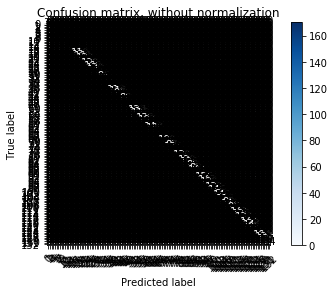

In [30]:
plot_confusion_matrix(conf_mat, classes=range(133),
                      title='Confusion matrix, without normalization')